## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

## Data Preprocessing:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('Airlines.xlsx', sheet_name = 'data')

In [5]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### Remove unwanted columns

In [8]:
data = data.drop('ID#', axis=1)

### Check for outliers

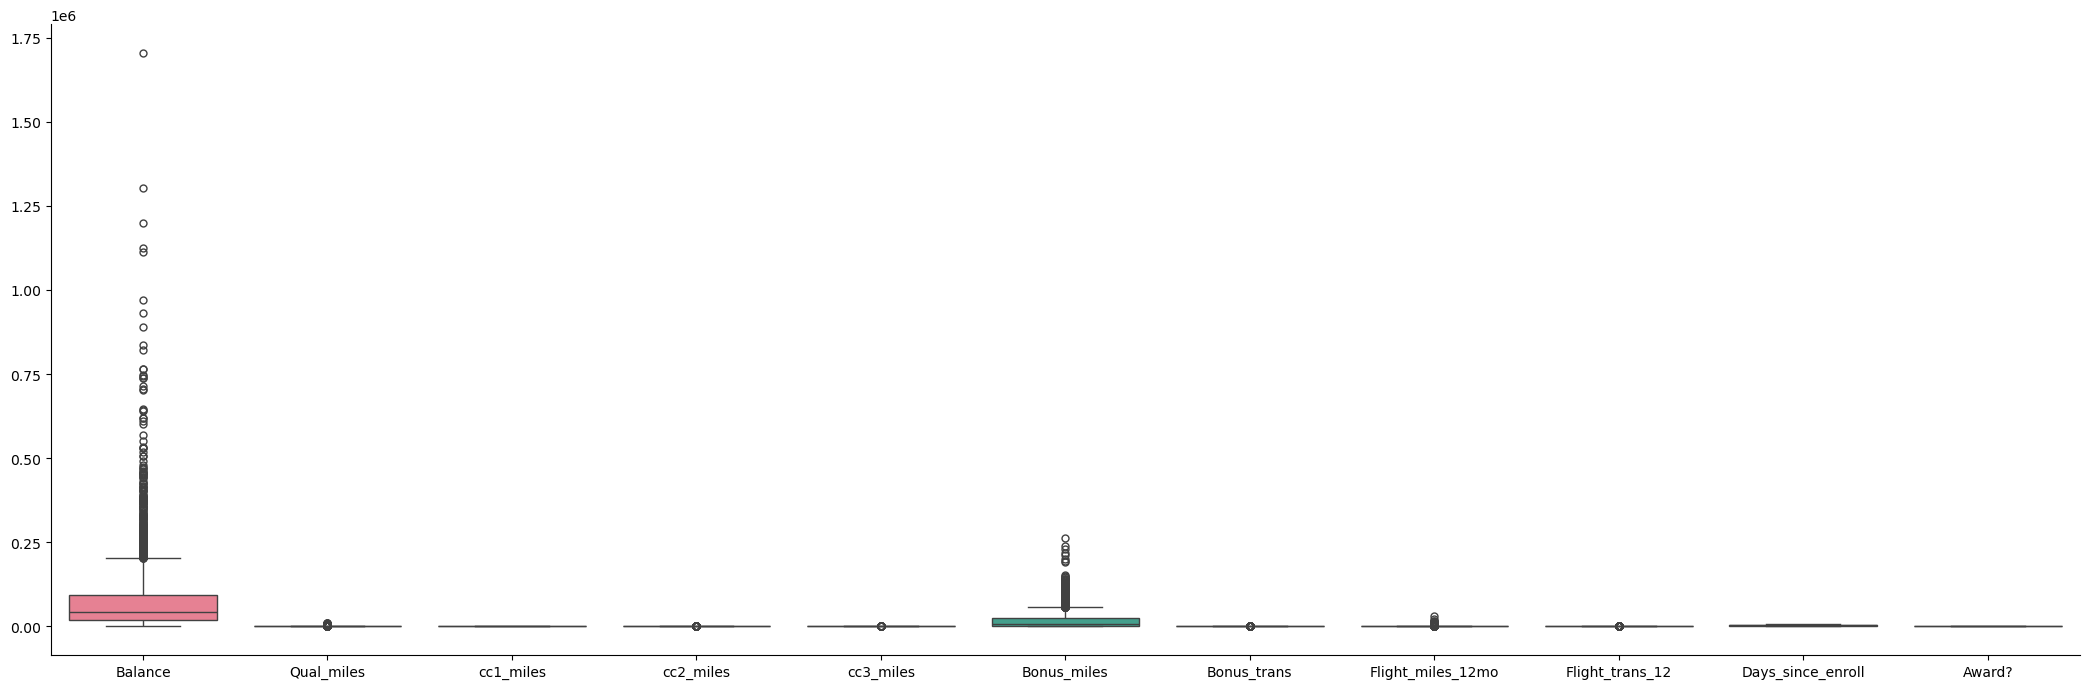

In [10]:
sns.catplot(data, kind = 'box', height = 7, aspect = 3)
plt.show()

In [11]:
numeric_cols = data[['Balance', 'Qual_miles', 'cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]
outliers = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_limit) | (data[col] > upper_limit)].shape[0]


In [12]:
outliers

{'Balance': 266,
 'Qual_miles': 226,
 'cc1_miles': 0,
 'cc2_miles': 43,
 'cc3_miles': 18,
 'Bonus_miles': 280,
 'Bonus_trans': 63,
 'Flight_miles_12mo': 569,
 'Flight_trans_12': 565,
 'Days_since_enroll': 0}

In [13]:
# Loop through each numeric column
for col in numeric_cols:
    # Calculate Q1, Q3, and IQR
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    
    # Define the upper and lower limits
    ulimit = q3 + 1.5 * IQR
    llimit = q1 - 1.5 * IQR
    
    # Apply capping/flooring: Cap values outside the limits to the nearest limit
    data[col] = data[col].apply(
        lambda x: ulimit if x > ulimit else (llimit if x < llimit else x)
    )

In [14]:
numeric_cols = data[['Balance', 'Qual_miles', 'cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]
outliers = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_limit) | (data[col] > upper_limit)].shape[0]

In [15]:
outliers

{'Balance': 0,
 'Qual_miles': 0,
 'cc1_miles': 0,
 'cc2_miles': 0,
 'cc3_miles': 0,
 'Bonus_miles': 0,
 'Bonus_trans': 0,
 'Flight_miles_12mo': 0,
 'Flight_trans_12': 0,
 'Days_since_enroll': 0}

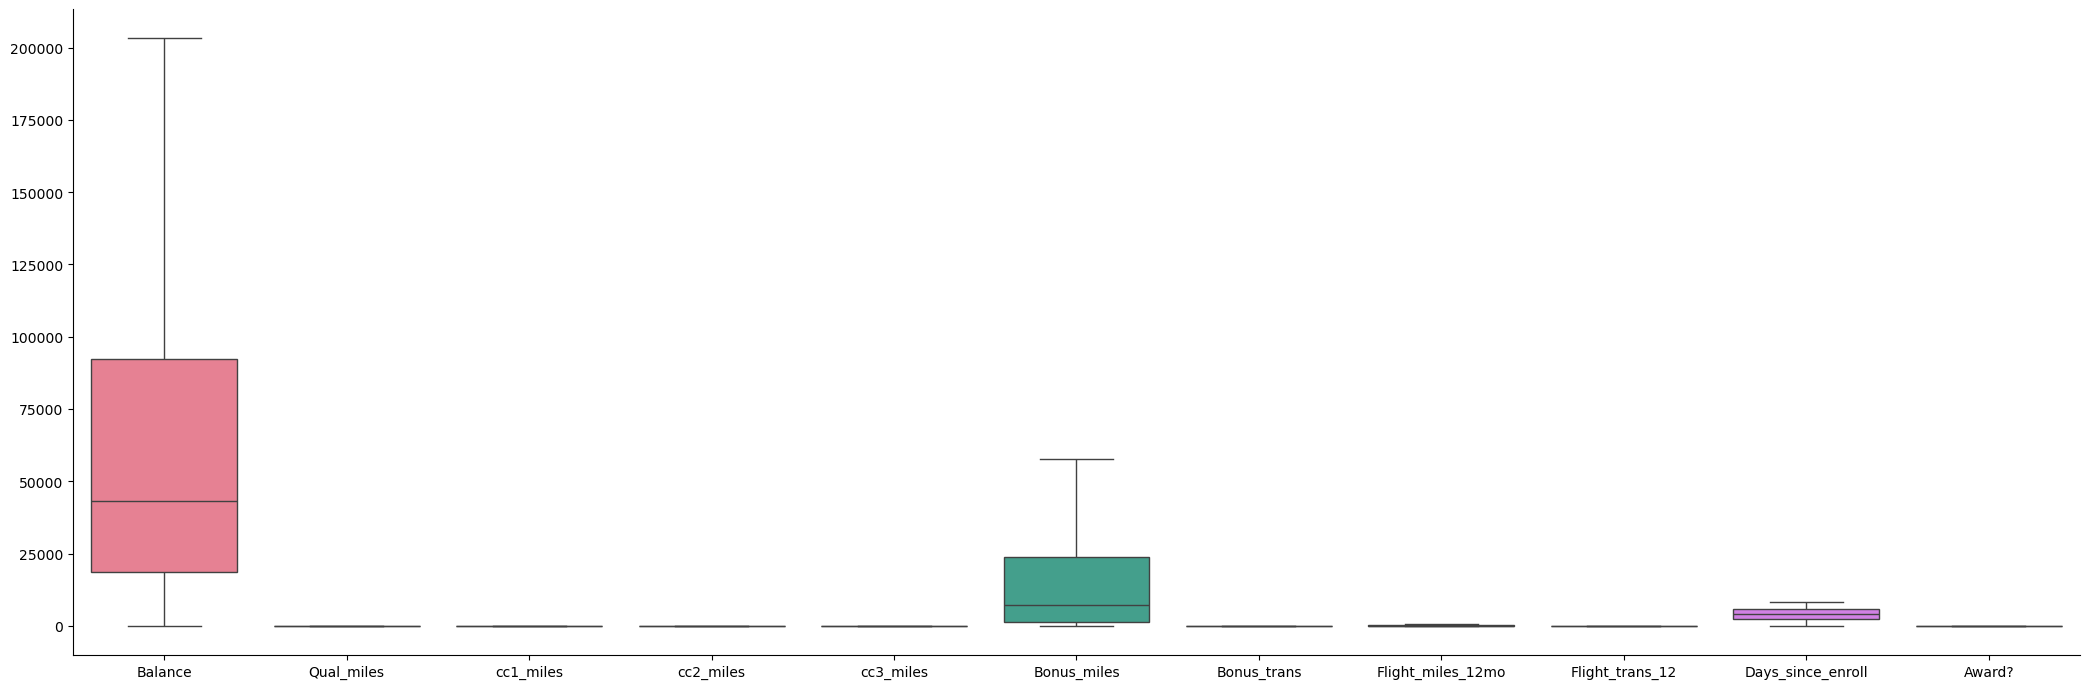

In [16]:
sns.catplot(data, kind = 'box', height = 7, aspect = 3)
plt.show()

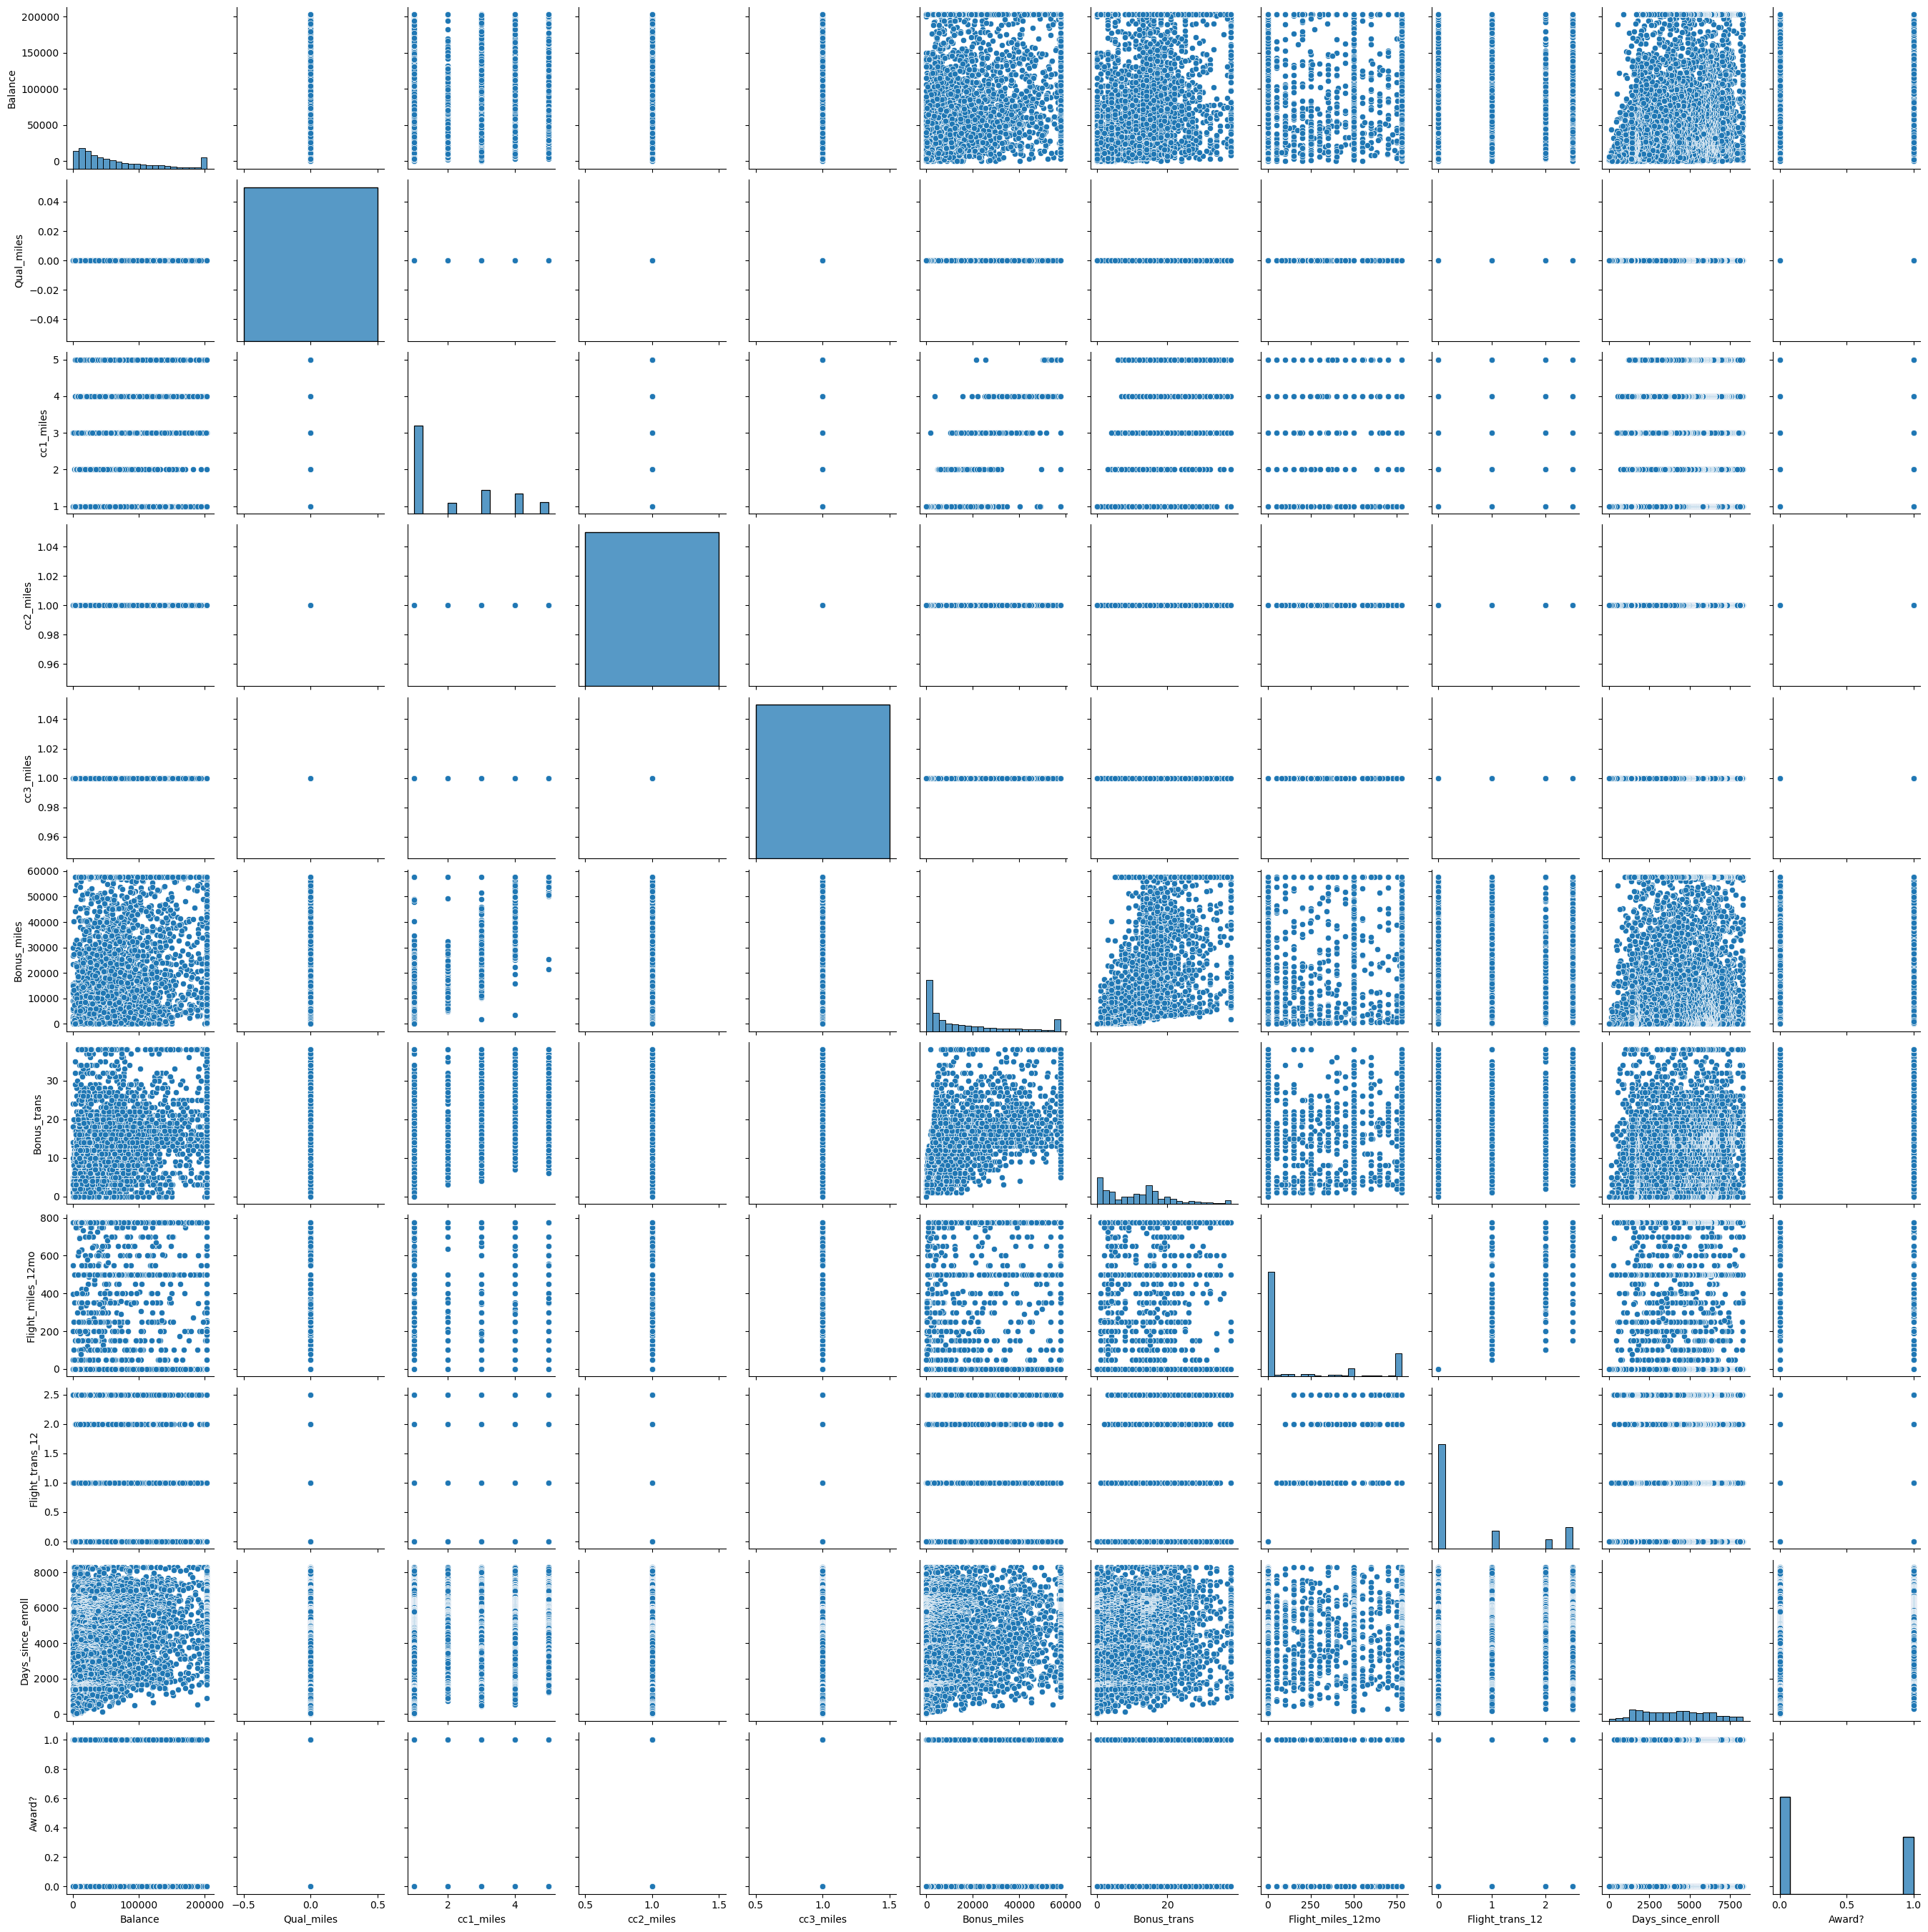

In [17]:
sns.pairplot(data)
plt.show()

In [18]:
data['Award?'].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

## KMEANS

In [20]:
kmeans = data.iloc[:,:10]

In [21]:
kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403
3995,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395
3996,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402
3997,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401


## Scale the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaled_kmeans = scaler.fit_transform(kmeans)

In [26]:
scaled_kmeans

array([[-0.60725829,  0.        , -0.76957841, ..., -0.60431348,
        -0.62614341,  1.39545434],
       [-0.75894657,  0.        , -0.76957841, ..., -0.60431348,
        -0.62614341,  1.37995704],
       [-0.38206963,  0.        , -0.76957841, ..., -0.60431348,
        -0.62614341,  1.41192021],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -0.60431348,
        -0.62614341, -1.31560393],
       [-0.15118775,  0.        , -0.76957841, ...,  1.09266586,
         0.43238439, -1.31608822],
       [-1.03556163,  0.        , -0.76957841, ..., -0.60431348,
        -0.62614341, -1.31754109]])

## Build the model

In [28]:
from sklearn.cluster import KMeans

In [29]:
model = KMeans(n_clusters = 3, random_state = 42)

In [30]:
model.fit(scaled_kmeans)

KMeans(n_clusters=3, random_state=42)

In [31]:
model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
kmeans['labels'] = model.labels_ 

In [33]:
kmeans.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,labels
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,1
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,1
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,1
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,1
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,0


In [34]:
kmeans['labels'].value_counts()

labels
1    2232
2    1029
0     738
Name: count, dtype: int64

## Metric for evaluating the model

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(scaled_kmeans, kmeans['labels'])

0.36000008545710965

### K-Means has the highest silhouette score among DBSCAN (0.3153) and Hierarchical Clustering (0.3391).
### This suggests that K-Means provides better-defined clusters with less overlap.
### However, a score of 0.36 is still moderate
### Additional preprocessing, such as PCA or feature selection, might help enhance cluster separation.

In [38]:
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(scaled_kmeans)
    wcss.append(model.inertia_)

In [39]:
wcss

[27993.000000000004,
 18910.919951548425,
 14316.216153683148,
 11942.974501775456,
 10686.269291340739,
 9414.587651780867,
 8699.541191744844,
 8235.420936498916,
 7701.741954345026,
 7266.281326547239]

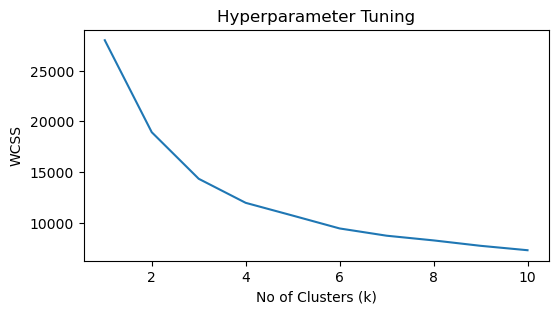

In [40]:
plt.figure(figsize=(6,3))
plt.title('Hyperparameter Tuning')
plt.xlabel('No of Clusters (k)')
plt.ylabel('WCSS')
plt.plot(range(1,11), wcss)
plt.show()

## Hierarchical clustering 

In [42]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1


In [43]:
hier = data.iloc[:,:10]

In [44]:
hier.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935


## Scale the data

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
scaled_hier = scaler.fit_transform(hier)

## Build the model

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
model = AgglomerativeClustering(n_clusters=3, linkage='complete')
model.fit(scaled_hier)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [51]:
model.labels_

array([0, 0, 0, ..., 0, 2, 0], dtype=int64)

In [52]:
hier['label'] = model.labels_

In [53]:
hier.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,label
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1


## Metric for evaluating the model

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
silhouette_score(scaled_hier, hier['label'])

0.33911789034252193

### 1. The clustering quality is slightly better than DBSCAN (0.3153) but still moderate.
### 2. There is some overlap between clusters, suggesting they are not well-separated.

## DBSCAN

In [58]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1


In [59]:
db = data.iloc[:,:10]

In [60]:
db.head() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935


## Scale the data

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()
scaled_db = scaler.fit_transform(db)

## Build the Model

In [65]:
from sklearn.cluster import DBSCAN

In [244]:
model = DBSCAN(min_samples=13, eps=0.5)
model.fit(scaled_db)

DBSCAN(min_samples=13)

In [245]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [248]:
db['label'] = model.labels_

In [249]:
db.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,label
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,0


## Metric for evaluating the model

In [251]:
from sklearn.metrics import silhouette_score

In [255]:
silhouette_score(scaled_db, db['label'])

0.3153488361889558

### The clustering quality is moderate; clusters exist but are not well-separated.
### Some overlap or noise in the data might be affecting the results.